бинарный поиск 1300 3500 6000  
бинарная вставка 1300 3500 6000

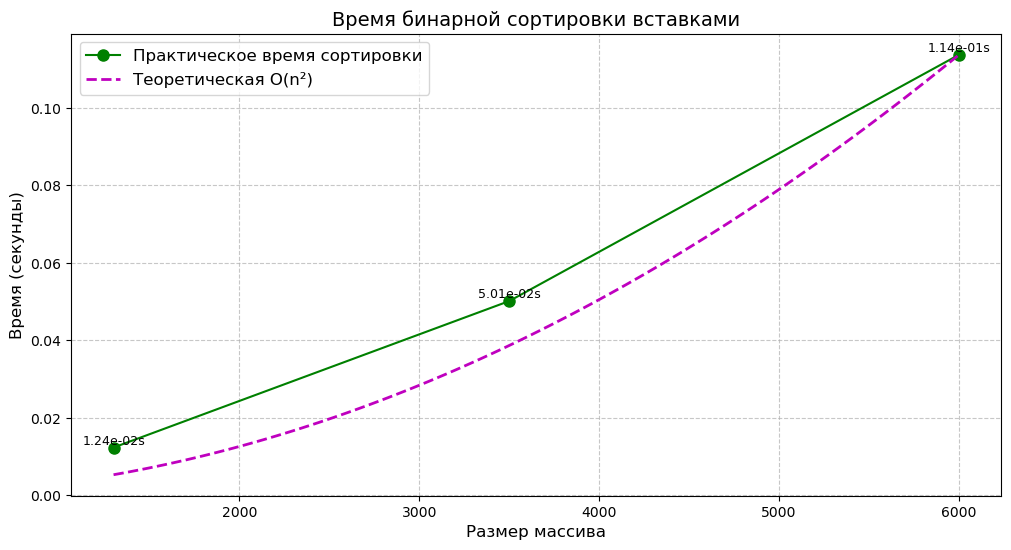

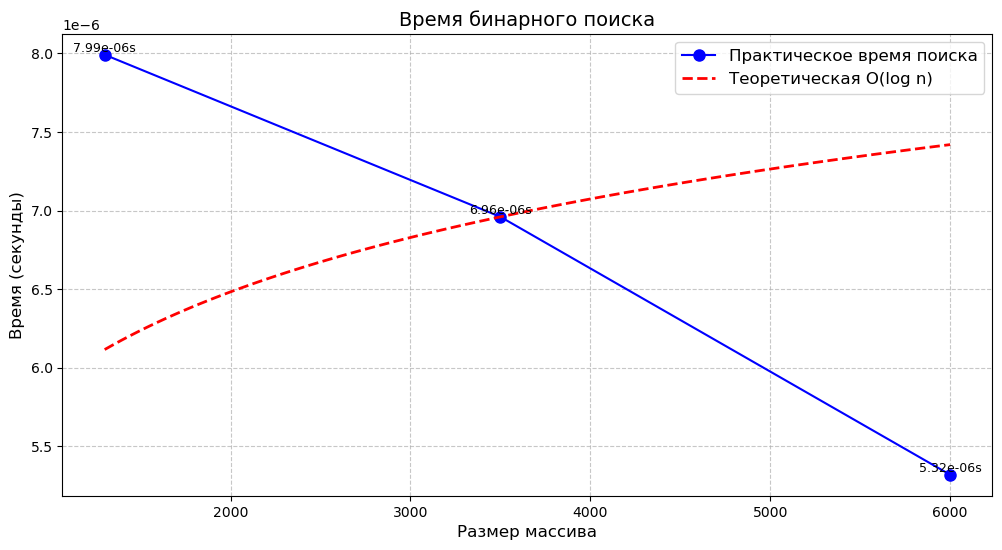

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import math
import numpy as np

def binary_search(arr, target):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] < target:
            low = mid + 1
        elif arr[mid] > target:
            high = mid - 1
        else:
            print(mid)
            return mid
    return -1

def binary_insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        pos = binary_search_insertion_index(arr, key, 0, i-1) # Ищем индекс для вставки
        arr[pos+1:i+1] = arr[pos:i]
        arr[pos] = key

def binary_search_insertion_index(arr, target, low, high):
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    print(low)
    return low
    

# Делаем десять циклов для усреднения результатов
array_sizes = [1300, 3500, 6000]
num_trials = 10  
sort_times_avg = []
search_times_avg = []

for size in array_sizes:
    total_sort_time = 0
    total_search_time = 0
    
    for _ in range(num_trials):
        arr = [random.randint(-9999, 9999) for _ in range(size)]
        
        start_time = time.perf_counter()
        binary_insertion_sort(arr)
        total_sort_time += time.perf_counter() - start_time
        
        # Поиск случайного элемента
        target = random.choice(arr)
        start_time = time.perf_counter()
        binary_search(arr, target)
        total_search_time += time.perf_counter() - start_time
    
    sort_times_avg.append(total_sort_time / num_trials)
    search_times_avg.append(total_search_time / num_trials)

# График 1: Время сортировки (O(n²))
plt.figure(figsize=(12, 6))

# Экспериментальные данные
plt.plot(array_sizes, sort_times_avg, 'go-', label='Практическое время сортировки', markersize=8)

# Теоретическая кривая O(n²) (нормированная)
# Нормируем по последней точке
n = array_sizes[-1]
k = sort_times_avg[-1] / (n ** 2)
x = np.linspace(min(array_sizes), max(array_sizes), 100)
y_theory_sort = k * (x ** 2)
plt.plot(x, y_theory_sort, 'm--', label='Теоретическая O(n²)', linewidth=2)

plt.xlabel('Размер массива', fontsize=12)
plt.ylabel('Время (секунды)', fontsize=12)
plt.title('Время бинарной сортировки вставками', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Добавление значений на точки
for i, (size, time_val) in enumerate(zip(array_sizes, sort_times_avg)):
    plt.text(size, time_val, f'{time_val:.2e}s', ha='center', va='bottom', fontsize=9)

# График 2: Время поиска (O(log n))
plt.figure(figsize=(12, 6))

plt.plot(array_sizes, search_times_avg, 'bo-', label='Практическое время поиска', markersize=8)

# Теоретическая кривая O(log n) (нормированная)
# Нормируем по средней точке
n = array_sizes[len(array_sizes)//2]
k = search_times_avg[len(array_sizes)//2] / math.log2(n)
x = np.linspace(min(array_sizes), max(array_sizes), 100)
y_theory_search = k * np.log2(x)
plt.plot(x, y_theory_search, 'r--', label='Теоретическая O(log n)', linewidth=2)

plt.xlabel('Размер массива', fontsize=12)
plt.ylabel('Время (секунды)', fontsize=12)
plt.title('Время бинарного поиска', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

for i, (size, time_val) in enumerate(zip(array_sizes, search_times_avg)):
    plt.text(size, time_val, f'{time_val:.2e}s', ha='center', va='bottom', fontsize=9)

plt.show()

print()